In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('amz_uk_price_prediction_dataset.csv')
df.tail(4)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing
2443650,2828593,B08P3W9B3T,RIDEX CJ223 Motorcycle Motorbike Jacket Armour...,4.5,34,53.99,False,0,Motorbike Clothing


In [3]:
df_num=df[['stars','reviews','price']]
df_cat=df[['isBestSeller','boughtInLastMonth','category']]

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*

In [12]:
df_cat.groupby('category')['isBestSeller'].value_counts()

category                        isBestSeller
3D Printers                     False             247
                                True                1
3D Printing & Scanning          False            4065
                                True                2
Abrasive & Finishing Products   False             245
                                                ...  
Women                           False           17559
                                True              213
Women's Sports & Outdoor Shoes  False            1939
                                True               20
eBook Readers & Accessories     False             246
Name: count, Length: 556, dtype: int64

In [4]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

In [5]:
columna_true = crosstab[True]
columna_true.sort_values(ascending=False).reset_index()
#Acorde con la crosstab realizada, las categorías con más productos bestseller son Grocery, Health, Baby, Sports and Power,

,category,True
0,Grocery,556
1,Health & Personal Care,552
2,Baby,341
3,Sports & Outdoors,330
4,Power & Hand Tools,306
...,...,...
291,Downhill Ski Boots,0
292,Digital Frames,0
293,Motorbike Chassis,0
294,Motorbike Drive & Gears,0


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

In [ ]:
from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value
'''
#La estadística de Chi^2 se enfoca en rechazar la correlación (hipótesis nula). Este valor indica qué tan diferentes son las frecuencias
esperadas bajo la hipótesis nula. Por lo tanto, los valores bajos de chi^2 implican aceptar la hipótesis nula. 

#Por su parte, el valor p es la probabilidad de que las variables comparadas sean independientes. 

# En este caso, se rechaza la hipótesis nula de correlación. '''

(36540.20270061387, 0.0)

In [ ]:
from scipy.stats.contingency import association
association(crosstab, method="cramer")

'''EL valor de la asociación de Cramer, oscila entre 0 y 1, donde 1 es indicativo de una fuerte asociación entre
las variables analizadas. EN este caso se observa un valor menor a 0.15, lo que indica una débil o baja
relación entre la variables'''

0.1222829439760564

**Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

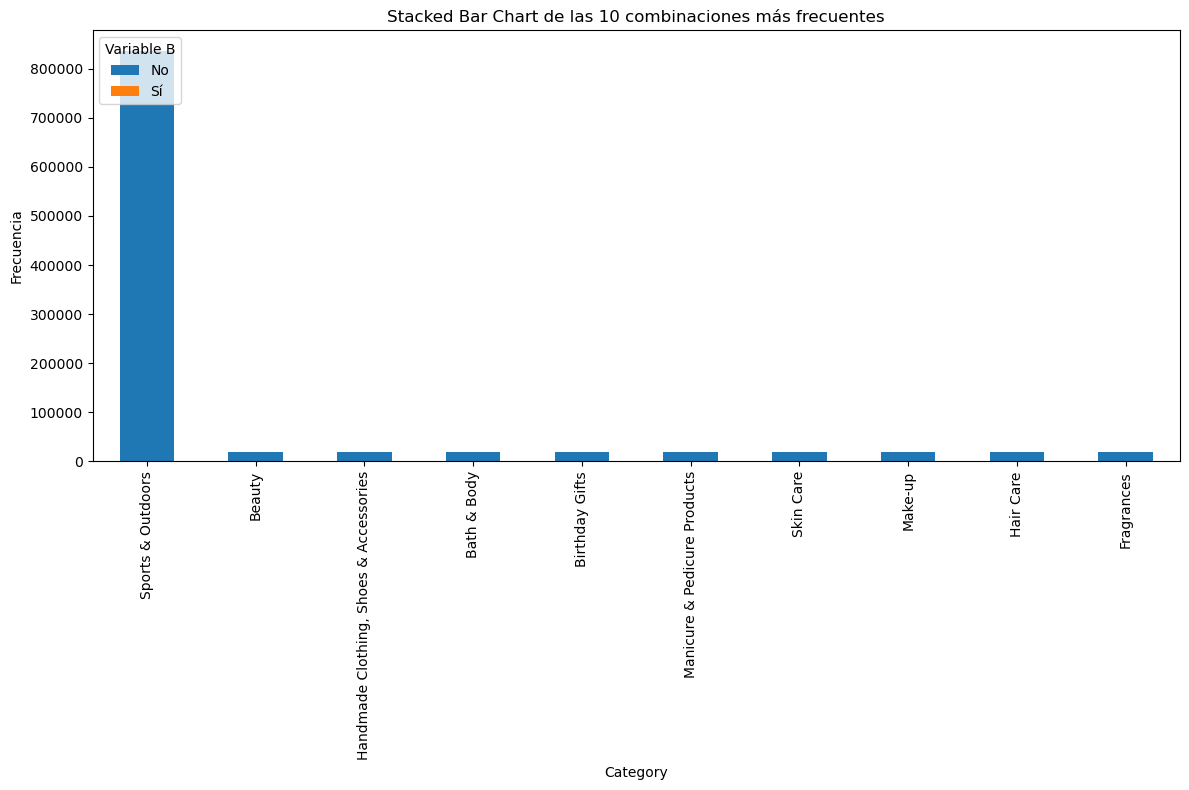

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ordenar las combinaciones por la suma de las filas (frecuencia total de cada categoría de Variable_A)
top_10 = crosstab.sum(axis=1).nlargest(10)

# Filtrar solo las 10 combinaciones con más frecuencia
filtered_crosstab = crosstab.loc[top_10.index]

# Graficar el gráfico de barras apiladas para las 10 combinaciones más frecuentes
ax = filtered_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8))

# Personalizar el gráfico
plt.title('Stacked Bar Chart de las 10 combinaciones más frecuentes')
plt.xlabel('Category')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.legend(title='Variable B', loc='upper left', labels=['No', 'Sí'])
plt.tight_layout()

# Mostrar el gráfico
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

In [54]:
def delete_tukeys_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    condition = (df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)
    return df[condition]

# Example usage:
df_price = delete_tukeys_outliers(df_num, 'price')

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

C:\Users\Gerardo\AppData\Local\Temp\ipykernel_14144\2358070577.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.violinplot(data=filtered_df, x='category', y='price', palette="coolwarm")


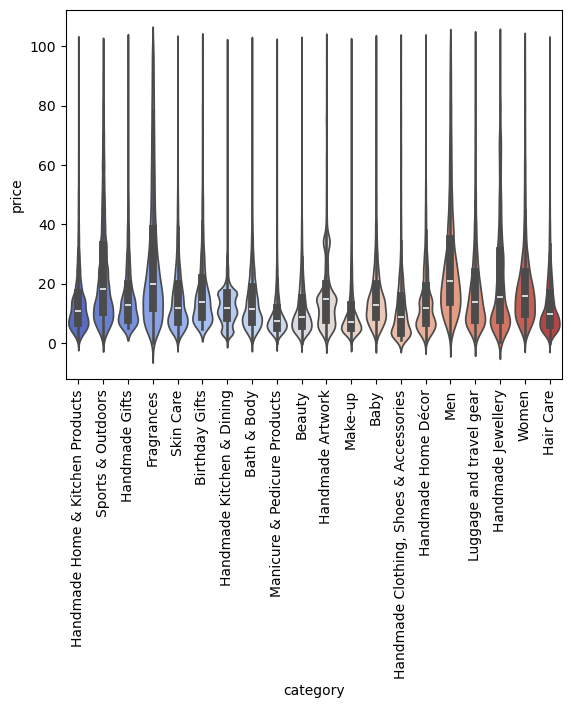

In [ ]:
#Filtro al dataframe para obtener las 20 categorías con más productos
frequencies = df_price['category'].value_counts()

# Seleccionar las 20 categorías más frecuentes
top_20_frequent = frequencies.head(20)

# Filtrar el DataFrame para mostrar solo las filas con las categorías más frecuentes
filtered_df = df_price[df_price['category'].isin(top_20_frequent.index)]

#Una vez filtrado el dataframe, se realiza el gráfico de violín
# Plotting 
import matplotlib.pyplot as plt
import seaborn as sb
sb.violinplot(data=filtered_df, x='category', y='price', palette="coolwarm")

# Poner las etiquetas del eje X en vertical
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

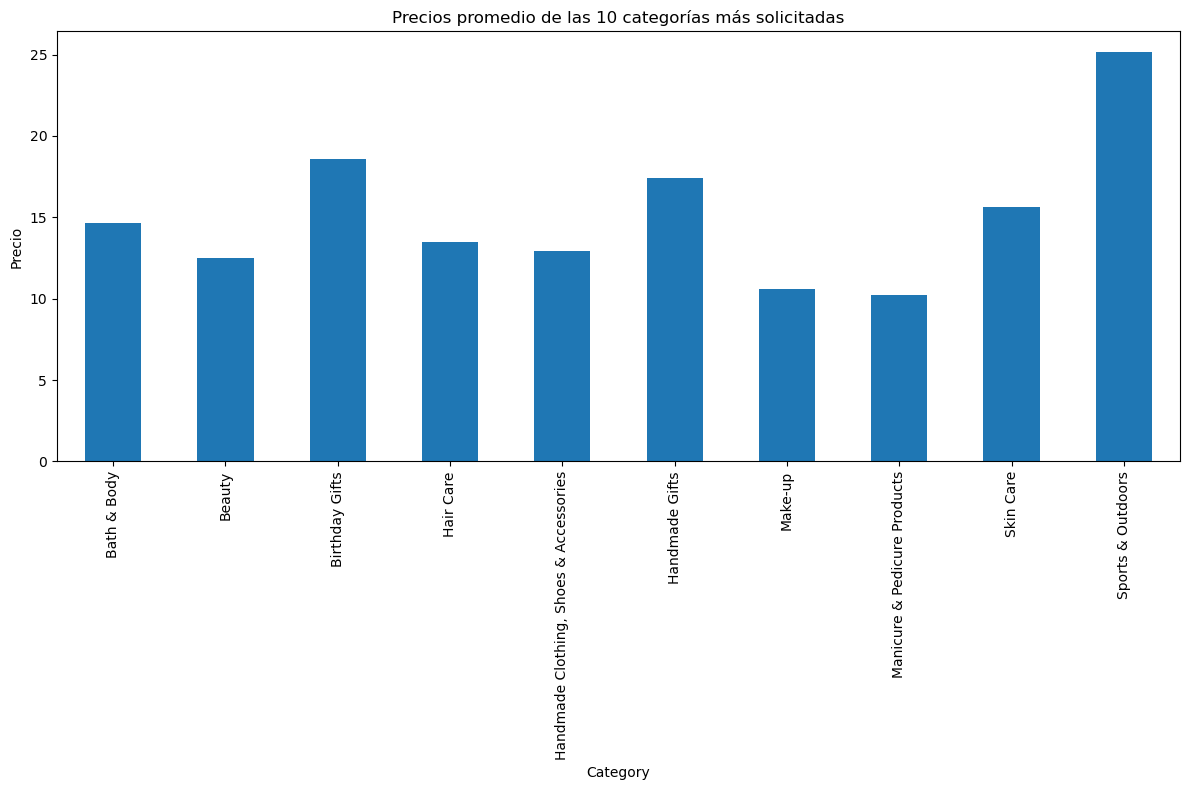

In [ ]:
#Filtro al dataframe para obtener las 20 categorías con más productos
frequencies = df_price['category'].value_counts()

# Seleccionar las 10 categorías más frecuentes
top_10_frequent = frequencies.head(10)

# Filtrar el DataFrame para mostrar solo las filas con las categorías más frecuentes
filtered_10price = df_price[df_price['category'].isin(top_10_frequent.index)]

averages = filtered_10price.groupby('category')['price'].mean()

#Una vez calculadas las medias, se realiza el gráfico:
# Graficar el gráfico de barras 
ax = averages.plot(kind='bar', figsize=(12, 8))

# Personalizar el gráfico
plt.title('Precios promedio de las 10 categorías más solicitadas')
plt.xlabel('Category')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
averages_nooutliers = df_price.groupby('category')['price'].mean()
averages_nooutliers.sort_values(ascending=False)
#Sin considerar outliers, MOtherboards tiene la media de precios más alta

category
Motherboards             68.772432
Boxing Shoes             67.417803
Desktop PCs              66.915562
Tablets                  66.552971
Graphics Cards           65.103509
                           ...    
Bedding Accessories       8.835220
Adapters                  8.750197
Signs & Plaques           8.210513
Arts & Crafts             8.006540
Office Paper Products     6.876369
Name: price, Length: 296, dtype: float64

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

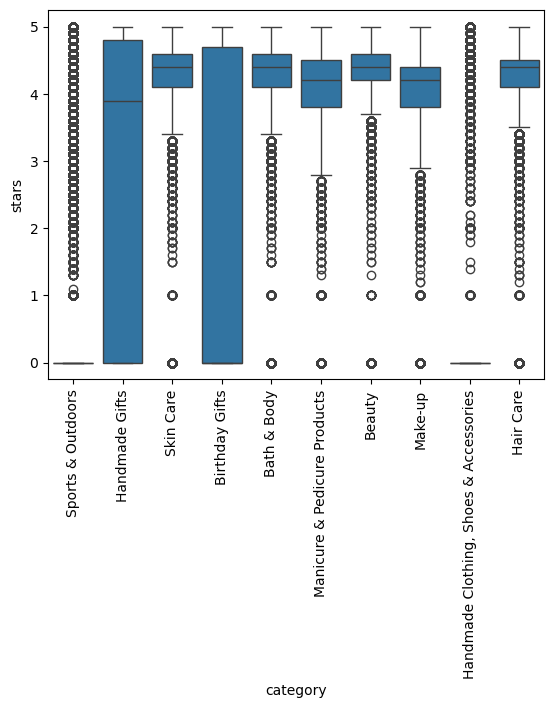

'\ndel gráfico se observa como en handmade y sports\n'

In [ ]:
#Filtro al dataframe para obtener las 10 categorías con más productos
frequencies = df_price['category'].value_counts()

# Seleccionar las1 0 categorías más frecuentes
top_10_frequent = frequencies.head(10)

# Filtrar el DataFrame para mostrar solo las filas con las categorías más frecuentes
filtered_10 = df_price[df_price['category'].isin(top_10_frequent.index)]

#Una vez filtrado el dataframe, se realiza el gráfico boxplot
# Plotting 
import matplotlib.pyplot as plt
import seaborn as sb
sb.boxplot(data=filtered_10, x='category', y='stars')#,showfliers=False
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

'''
del gráfico se observa como en handmade clothing y sports, es probable que no haya muchas valoraciones, ylas pocas que hay
estan representadas por outliers. 
Handmade gifts y birthday gifts son las categorías con valoraciones más diferentes. EL esto tiende a valoraciones cercanas a 4
'''

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?

In [ ]:
# Calculating the Pearson correlation coefficient between '
correlation = df_price['price'].corr(df['stars'])
correlation

'''EL bajo valor del coeficiente no indica una correlación lineal entre las variables'''

-0.0776729987818137

In [ ]:
# Calculating the Spearman rank correlation between 'SalePrice' and 'GrLivArea' 
correlation = df_price['price'].corr(df_price['stars'], method='spearman')
correlation
'''EL bajo valor del coeficiente no indica una correlación lineal o monótona entre las variables'''

-0.06679697280768314

<Axes: xlabel='price', ylabel='stars'>

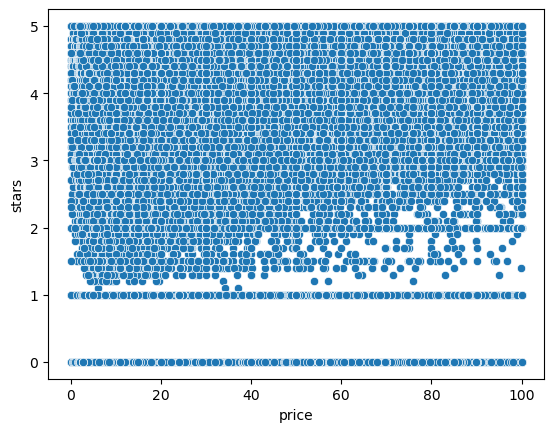

In [50]:
# Plotting a scatter plot to visualize the relationship between 'GrLivArea' and 'SalePrice'
import matplotlib.pyplot as plt
import seaborn as sb
sb.scatterplot(data=df_price, x='price', y='stars')

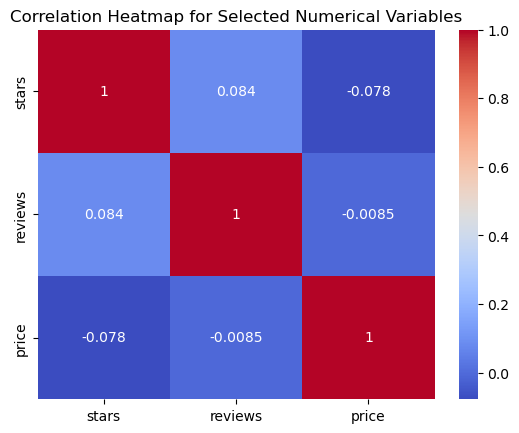

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
correlation_matrix = df_price.corr() #Pearson


# Drawing the heatmap for the numerical columns
sb.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

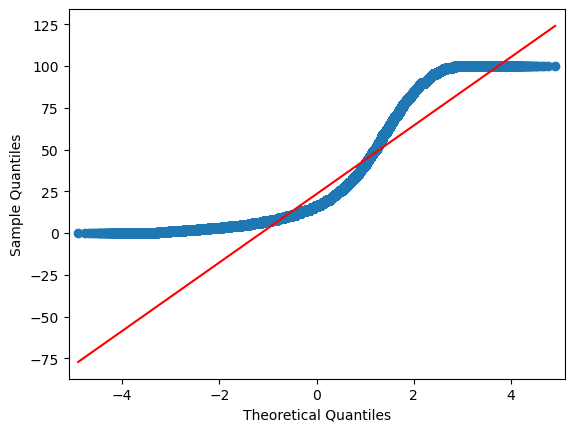

In [59]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'SalePrice' to check if its distribution follows a normal distribution
sm.qqplot(df_price['price'], line='s');